Hola &#x1F600;

Soy **Hesus Garcia**  como "Jesús" pero con H. Sé que puede ser confuso al principio, pero una vez que lo recuerdes, ¡nunca lo olvidarás! &#x1F31D;	. Como revisor de código de Practicum, estoy emocionado de examinar tus proyectos y ayudarte a mejorar tus habilidades en programación. si has cometido algún error, no te preocupes, pues ¡estoy aquí para ayudarte a corregirlo y hacer que tu código brille! &#x1F31F;. Si encuentro algún detalle en tu código, te lo señalaré para que lo corrijas, ya que mi objetivo es ayudarte a prepararte para un ambiente de trabajo real, donde el líder de tu equipo actuaría de la misma manera. Si no puedes solucionar el problema, te proporcionaré más información en la próxima oportunidad. Cuando encuentres un comentario,  **por favor, no los muevas, no los modifiques ni los borres**. 

Revisaré cuidadosamente todas las implementaciones que has realizado para cumplir con los requisitos y te proporcionaré mis comentarios de la siguiente manera:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

</br>

**¡Empecemos!**  &#x1F680;

Hecho por: Ilse Salinas

# Proyecto final
## Descripción
Al operador de telecomunicaciones Interconnect le gustaría poder pronosticar su tasa de cancelación de clientes. Si se descubre que un usuario o usuaria planea irse, se le ofrecerán códigos promocionales y opciones de planes especiales. El equipo de marketing de Interconnect ha recopilado algunos de los datos personales de sus clientes, incluyendo información sobre sus planes y contratos.

### Servicios de Interconnect

Interconnect proporciona principalmente dos tipos de servicios:

1. Comunicación por teléfono fijo. El teléfono se puede conectar a varias líneas de manera simultánea.
2. Internet. La red se puede configurar a través de una línea telefónica (DSL, *línea de abonado digital*) o a través de un cable de fibra óptica.

Algunos otros servicios que ofrece la empresa incluyen:

- Seguridad en Internet: software antivirus (*ProtecciónDeDispositivo*) y un bloqueador de sitios web maliciosos (*SeguridadEnLínea*).
- Una línea de soporte técnico (*SoporteTécnico*).
- Almacenamiento de archivos en la nube y backup de datos (*BackupOnline*).
- Streaming de TV (*StreamingTV*) y directorio de películas (*StreamingPelículas*)

La clientela puede elegir entre un pago mensual o firmar un contrato de 1 o 2 años. Puede utilizar varios métodos de pago y recibir una factura electrónica después de una transacción.

### Descripción de los datos

Los datos consisten en archivos obtenidos de diferentes fuentes:

- `contract.csv` — información del contrato;
- `personal.csv` — datos personales del cliente;
- `internet.csv` — información sobre los servicios de Internet;
- `phone.csv` — información sobre los servicios telefónicos.

En cada archivo, la columna `customerID` (ID de cliente) contiene un código único asignado a cada cliente. La información del contrato es válida a partir del 1 de febrero de 2020.


## Preprocesamiento de los datos
### Importación de librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.model_selection import StratifiedKFold, cross_val_predict, cross_val_score
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Quería proporcionarte algunos comentarios sobre la organización de los imports en tu código. Entiendo que esto se te proporcionó como parte de una plantilla, sin embargo es importante destacar el orden de los imports. 
    
Es preferible agrupar los imports siguiendo el siguiente orden:

Imports de la biblioteca estándar de Python.
Imports de bibliotecas de terceros relacionadas.
Imports específicos de la aplicación local o biblioteca personalizada.
Para mejorar la legibilidad del código, también es recomendable dejar una línea en blanco entre cada grupo de imports, pero solo un import por línea.
Te dejo esta referencia con ejemplos:  
https://pep8.org/#imports

</div>

### Extracción y limpieza de los datos

In [2]:
df_contract = pd.read_csv('/datasets/final_provider/contract.csv')
df_personal = pd.read_csv('/datasets/final_provider/personal.csv')
df_internet = pd.read_csv('/datasets/final_provider/internet.csv')
df_phone = pd.read_csv('/datasets/final_provider/phone.csv')

In [3]:
# Funcion de eliminar duplicados
def duplicados(df):
    sin_duplicados = df.drop_duplicates()
    print(f'Dataframe sin duplicados.')
    return sin_duplicados

In [4]:
# Funcion de nulos
def nulos(df):
    for columna in df.columns:
        if df[columna].dtype == 'int64' or df[columna].dtype == 'Int64'or df[columna].dtype == 'float64':
            # Reemplazar valores nulos por 0 en columnas enteras
            df[columna] = df[columna].fillna(0)
        elif df[columna].dtype == 'object':
            # Reemplazar valores nulos por 'indeterminado' en columnas de tipo objeto
            df[columna] = df[columna].fillna('indeterminado')
    print(f'Dataframe sin nulos.')
    return df

In [5]:
# Funcion de cambio de tipo de variable
def convertir_a_datetime(df, columna):
    df[columna] = pd.to_datetime(df_contract[columna], errors='coerce')
    return df

In [6]:
# Funcion que limpia columna 'customerID', pone en mayusculas y quita espacios
def limpia_id(df, columna):
    df[columna] = df[columna].str.upper()
    df[columna] = df[columna].str.replace(' ', '')
    return df

In [7]:
# Funcion para renombrar columnas con formato especificado
def formato_columna(columna):
    nuevo_nombre = columna[0].upper()  # Convertir la primera letra a mayuscula
    guion_bajo_agregado = False  # Bandera para verificar si ya se añadió el guion bajo
    for char in columna[1:]:
        if char.isupper() and not guion_bajo_agregado:
            nuevo_nombre += '_'  # Insertar un guion bajo antes de las letras mayusculas
            guion_bajo_agregado = True  # Evitar agregar más guiones bajos
        nuevo_nombre += char
    return nuevo_nombre

# Funcion para aplicar la renombracion a todas las columnas
def renombrar_columna(df):
    df.columns = [formato_columna(col) for col in df.columns]
    return df

#### Dataframe 1

In [8]:
print('Informacion del dataframe "contract": \n')
df_contract.info()
print('\n',df_contract.head(5))

Informacion del dataframe "contract": 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB

    customerID   BeginDate              EndDate            Type  \
0  7590-VHVEG  2020-01-01                   No  Month-to-month   
1  5575-GNVDE  2017-04-01                   No        One year   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW  2016-05-01                   No        One year  

Nota: Hay que cambiar el tipo de dato de las columnas 'BeginDate' y 'EndDate' a tipo datetime y la columna 'TotalCharges' a flotante. Se puede observar que la columna EndDate contiene algunas filas con la palabra 'No', esto supongo que implica que aunque el cliente haya empezado un plan de cualquier tipo eso no significa que lo vaya a finalizar. Hay que prestar atención entonces a aquellos que si tienen una fecha puesta y aún mas si el tiempo entre el incio y el fin es más corto ya que facilmente se puede ir sin poder haberle promocionado algo al cliente. 
También es necesario limpiar en todos los dataframees la columna 'customerID' ya que es donde la información coincide entre clientes de diferentes planes. Esto es a futuro cuando juntemos todos los dataframes en uno solo y se maneje esta información en el modelo.

In [9]:
# Renombra columnas
df_contract = renombrar_columna(df_contract)

In [10]:
# Contar cuantos 'No' hay en la columna 'BeginDate' y 'EndDate'
conteo_no = df_contract['Begin_Date'].value_counts().get('No', 0)
print('Begin_Date conteo de "No":',conteo_no)
conteo_no = df_contract['End_Date'].value_counts().get('No', 0)
print('End_Date conteo de "No":',conteo_no)

Begin_Date conteo de "No": 0
End_Date conteo de "No": 5174


In [11]:
# Reemplazar 'No' con NaT y despues NaT con fecha estandar '1900-01-01'
# La fecha eestandar significa que no hay tiempo asignado
df_contract['End_Date'] = df_contract['End_Date'].replace('No', pd.NaT)
df_contract['End_Date'] = df_contract['End_Date'].fillna(pd.Timestamp('1900-01-01'))

# Convertir columnas a datetime
df_contract = convertir_a_datetime(df_contract, 'End_Date')
df_contract = convertir_a_datetime(df_contract, 'Begin_Date')

print(df_contract[['Begin_Date', 'End_Date', 'Type']].head())

  Begin_Date   End_Date            Type
0 2020-01-01 1900-01-01  Month-to-month
1 2017-04-01 1900-01-01        One year
2 2019-10-01 2019-12-01  Month-to-month
3 2016-05-01 1900-01-01        One year
4 2019-09-01 2019-11-01  Month-to-month


In [12]:
# Cambiar tipo de columna 'TotalCharges'
df_contract['Total_Charges'].replace('', np.nan, inplace=True)
df_contract['Total_Charges'] = pd.to_numeric(df_contract['Total_Charges'], errors='coerce')

In [13]:
# Es necesario limpiar en todos los dataframes la columna 'customerID' ya que es donde la informacion coincide entre clientes de diferentes planes
df_contract = limpia_id(df_contract,'Customer_ID')

In [14]:
df_contract = nulos(df_contract)
df_contract = duplicados(df_contract)
df_contract.info()

Dataframe sin nulos.
Dataframe sin duplicados.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer_ID        7043 non-null   object        
 1   Begin_Date         7043 non-null   datetime64[ns]
 2   End_Date           7043 non-null   datetime64[ns]
 3   Type               7043 non-null   object        
 4   Paperless_Billing  7043 non-null   object        
 5   Payment_Method     7043 non-null   object        
 6   Monthly_Charges    7043 non-null   float64       
 7   Total_Charges      7043 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 495.2+ KB


#### Dataframe 2

In [15]:
print('Informacion del dataframe "personal": \n')
df_personal.info()
print('\n',df_personal.sample(5))

Informacion del dataframe "personal": 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB

       customerID  gender  SeniorCitizen Partner Dependents
4713  7544-ZVIKX    Male              0     Yes        Yes
1107  0971-QIFJK  Female              0     Yes         No
6054  9445-SZLCH  Female              0     Yes        Yes
201   8544-GOQSH  Female              0      No         No
3082  3401-URHDA    Male              0      No         No


In [16]:
# Renombra columnas
df_personal = renombrar_columna(df_personal)

In [17]:
# Cambiar tipo de columna 'SeniorCitizen' de float a int
df_personal['Senior_Citizen'].fillna(0, inplace=True)
df_personal['Senior_Citizen'] = df_personal['Senior_Citizen'].astype(int)

In [18]:
# Es necesario limpiar en todos los dataframes la columna 'customerID' ya que es donde la informacion coincide entre clientes de diferentes planes
df_personal = limpia_id(df_personal,'Customer_ID')

In [19]:
df_personal = nulos(df_personal)
df_personal = duplicados(df_personal)
df_personal.info()

Dataframe sin nulos.
Dataframe sin duplicados.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer_ID     7043 non-null   object
 1   Gender          7043 non-null   object
 2   Senior_Citizen  7043 non-null   int64 
 3   Partner         7043 non-null   object
 4   Dependents      7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 330.1+ KB


#### Dataframe 3

In [20]:
print('Informacion del dataframe "internet": \n')
df_internet.info()
print('\n',df_internet.head(5))

Informacion del dataframe "internet": 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB

    customerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0  7590-VHVEG             DSL             No          Yes               No   
1  5575-GNVDE             DSL            Yes           No              Yes   
2  3668-QPYBK             DSL            Yes          Yes               No   
3  7795-CFOCW             DSL         

Nota: Este dataframe presenta menos cantidad de filas que los otros dos anteriores (este dataframe tiene 5517 y los otros dos 7043), supongo que esto se debe a que no todo mundo contrata el plan de internet sino que solamente el del telefono. Para aquellos que si obtuvieron la opcion del internet es posible que como extras obtengan o no otros servicios adicionales. En este caso, para aquellos clientes que no cuenten con internet, en el dataframe general se rellenaran estos espacios con valores negativos para que se tomen en cuenta el total de clientes presentes. 

In [21]:
# Renombra columnas
df_internet = renombrar_columna(df_internet)

In [22]:
# Es necesario limpiar en todos los dataframes la columna 'customerID' ya que es donde la informacion coincide entre clientes de diferentes planes
df_internet = limpia_id(df_internet,'Customer_ID')

Nota: Hay que checar cuantos ids hay comun de este con los dataframes anteriores y los que no esten en este ponerles valores nulos para que sean 7043 para que el dataframe final sea de este largo, lo mismo pasa con el de telefono.

In [23]:
df_internet = nulos(df_internet)
df_internet = duplicados(df_internet)
df_internet.info()

Dataframe sin nulos.
Dataframe sin duplicados.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer_ID        5517 non-null   object
 1   Internet_Service   5517 non-null   object
 2   Online_Security    5517 non-null   object
 3   Online_Backup      5517 non-null   object
 4   Device_Protection  5517 non-null   object
 5   Tech_Support       5517 non-null   object
 6   Streaming_TV       5517 non-null   object
 7   Streaming_Movies   5517 non-null   object
dtypes: object(8)
memory usage: 387.9+ KB


#### Dataframe 4

In [24]:
print('Informacion del dataframe "phone": \n')
df_phone.info()
print('\n',df_phone.head(5))

Informacion del dataframe "phone": 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB

    customerID MultipleLines
0  5575-GNVDE            No
1  3668-QPYBK            No
2  9237-HQITU            No
3  9305-CDSKC           Yes
4  1452-KIOVK           Yes


Nota: Pasa exactamente algo similar a lo anterior, no todos los clientes cuentan con el servicio de telefono es por ellos que quienes no cuenten con este servicio se rellenara con valores negativos. De esta forma se tendra el dataframe general completo con los 7043 clientes.

In [25]:
# Renombra columnas
df_phone = renombrar_columna(df_phone)

In [26]:
# Es necesario limpiar en todos los dataframes la columna 'customerID' ya que es donde la informacion coincide entre clientes de diferentes planes
df_phone = limpia_id(df_phone,'Customer_ID')

In [27]:
df_phone = nulos(df_phone)
df_phone = duplicados(df_phone)
df_phone.info()

print('\n Dataframes listos para EDA.')

Dataframe sin nulos.
Dataframe sin duplicados.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer_ID     6361 non-null   object
 1   Multiple_Lines  6361 non-null   object
dtypes: object(2)
memory usage: 149.1+ KB

 Dataframes listos para EDA.


### Dataframe general

In [28]:
# Rellenar dataframe de internet con valores de quienes no tengan esta servicio con valores negativos

# Encontrar los 'customerID' de df_personal que no están en df_internet
clientes_sin_internet = df_personal[~df_personal['Customer_ID'].isin(df_internet['Customer_ID'])]

# Mostrar los customerID que no están en df_internet
print(f"Clientes sin servicio de Internet: {len(clientes_sin_internet)}")

# Crear un nuevo DataFrame para los clientes que no están en df_internet
# Rellenar las columnas de servicios de Internet con 'No'
nueva_fila = clientes_sin_internet[['Customer_ID']].copy()
nueva_fila['Internet_Service'] = 'No'
nueva_fila['Online_Security'] = 'No'
nueva_fila['Online_Backup'] = 'No'
nueva_fila['Device_Protection'] = 'No'
nueva_fila['Tech_Support'] = 'No'
nueva_fila['Streaming_TV'] = 'No'
nueva_fila['Streaming_Movies'] = 'No'

# Agregar las nuevas filas al DataFrame df_internet
df_internet = pd.concat([df_internet, nueva_fila], ignore_index=True)
df_internet.info()
print(df_internet.sample(5))

Clientes sin servicio de Internet: 1526
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer_ID        7043 non-null   object
 1   Internet_Service   7043 non-null   object
 2   Online_Security    7043 non-null   object
 3   Online_Backup      7043 non-null   object
 4   Device_Protection  7043 non-null   object
 5   Tech_Support       7043 non-null   object
 6   Streaming_TV       7043 non-null   object
 7   Streaming_Movies   7043 non-null   object
dtypes: object(8)
memory usage: 440.3+ KB
     Customer_ID Internet_Service Online_Security Online_Backup  \
563   9450-TRJUU      Fiber optic              No            No   
3681  7508-DQAKK              DSL             Yes           Yes   
5481  6304-IJFSQ              DSL              No           Yes   
1805  7401-JIXNM              DSL             Yes           Yes   
476   0

In [29]:
# Rellenar dataframe de telefono con valores de quienes no tengan esta servicio con valores negativos
# Encontrar los 'customerID' de df_personal que no están en df_phone
clientes_sin_telefono = df_personal[~df_personal['Customer_ID'].isin(df_phone['Customer_ID'])]

# Mostrar los customerID que no están en df_phone
print(f"Clientes sin servicio de Internet: {len(clientes_sin_telefono)}")

# Crear un nuevo DataFrame para los clientes que no están en df_internet
# Rellenar las columnas de servicios de Internet con 'No'
nueva_fila = clientes_sin_telefono[['Customer_ID']].copy()
nueva_fila['Multiple_Lines'] = 'No'

# Agregar las nuevas filas al DataFrame df_phone
df_phone = pd.concat([df_phone, nueva_fila], ignore_index=True)
df_phone.info()
print(df_phone.sample(5))

Clientes sin servicio de Internet: 682
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer_ID     7043 non-null   object
 1   Multiple_Lines  7043 non-null   object
dtypes: object(2)
memory usage: 110.2+ KB
     Customer_ID Multiple_Lines
3796  2642-MAWLJ             No
3732  7184-LRUUR             No
3661  2984-MIIZL             No
5709  1597-LHYNC            Yes
4659  1156-ZFYDO             No


In [30]:
# Juntamos los 4 dataframes en un solo dataframe general usando 'Customer_ID' como clave
df = pd.merge(df_contract, df_personal, on='Customer_ID', how='inner')

# Combinar el resultado con df_internet
df = pd.merge(df, df_internet, on='Customer_ID', how='inner')

# Combinar el resultado con df_phone
df = pd.merge(df, df_phone, on='Customer_ID', how='inner')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer_ID        7043 non-null   object        
 1   Begin_Date         7043 non-null   datetime64[ns]
 2   End_Date           7043 non-null   datetime64[ns]
 3   Type               7043 non-null   object        
 4   Paperless_Billing  7043 non-null   object        
 5   Payment_Method     7043 non-null   object        
 6   Monthly_Charges    7043 non-null   float64       
 7   Total_Charges      7043 non-null   float64       
 8   Gender             7043 non-null   object        
 9   Senior_Citizen     7043 non-null   int64         
 10  Partner            7043 non-null   object        
 11  Dependents         7043 non-null   object        
 12  Internet_Service   7043 non-null   object        
 13  Online_Security    7043 non-null   object        
 14  Online_B

In [31]:
# Contar la cantidad de valores únicos en la columna 'customerID'
clientes_unicos = df['Customer_ID'].nunique()
print(f"Cantidad de valores únicos en 'Customer_ID': {clientes_unicos}")

Cantidad de valores únicos en 'Customer_ID': 7043


In [32]:
print(df.sample(5))

     Customer_ID Begin_Date   End_Date            Type Paperless_Billing  \
1900  0754-EEBDC 2019-10-01 1900-01-01        Two year                No   
3603  1501-SGHBW 2019-08-01 2019-10-01  Month-to-month                No   
3428  8749-JMNKX 2015-08-01 2019-11-01  Month-to-month               Yes   
4764  2962-XPMCQ 2019-11-01 2020-01-01  Month-to-month               Yes   
277   3179-GBRWV 2018-05-01 1900-01-01  Month-to-month               Yes   

                 Payment_Method  Monthly_Charges  Total_Charges Gender  \
1900               Mailed check            19.90          76.65   Male   
3603               Mailed check            45.85          81.00   Male   
3428  Bank transfer (automatic)            93.80        4750.95   Male   
4764           Electronic check            45.15          98.50   Male   
277   Bank transfer (automatic)            64.95        1339.80   Male   

      Senior_Citizen Partner Dependents Internet_Service Online_Security  \
1900               0  

<div class="alert alert-block alert-success">
<b>Comentarios del Revisor</b> <a class="tocSkip"></a><br>
Quiero darte un consejo útil: en lugar de usar la función `print` para mostrar tus DataFrames en Jupyter Notebook, simplemente escribe el nombre del DataFrame en una celda.

En otras palabras, en lugar de hacer esto:

```python
print(mi_dataframe)
```

Puedes hacer esto en una celda por separado:

```python
mi_dataframe
```

Cuando lo haces de esta manera, Jupyter Notebook interpreta y muestra tus DataFrames de una manera más agradable, haciéndolos más fáciles de leer. No es necesario usar `print` en este caso.

Espero que esta sugerencia te ayude a trabajar de manera más eficiente en tus proyectos. ¡Sigue adelante y sigue aprendiendo!
</div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>

¡Felicidades por completar esta sección con éxito! Has hecho un gran trabajo. Los valores esperados para esta sección se han cumplido con éxito gracias a tu dedicación y esfuerzo. Continúa así y sigue aprendiendo, ¡estoy seguro de que tendrás éxito en todo lo que te propongas!</div>


## EDA: Demostración visual

Este análisis exploratorio de datos (EDA) con visualizaciones puede ayudarnos a no solo entender mejor el comportamiento de los clientes sino al deducir información relevante sobre la cancelación de servicios en Interconnect, en la que nos podemos enfocar en los siguientes aspectos clave:

####  Número de clientes dados de baja
Hay que definir primero la cantidad de clientes que tienen ya establecida una fecha de cancelación de uso de servicios, esto es para enfocarnos particularmente en este grupo e identificar posteriormente que fue lo que los hizo retirarse. En el siguiente gráfico, se puede observar que el número de clientes que decide retirarse es aproximadamente del 26.5%. 

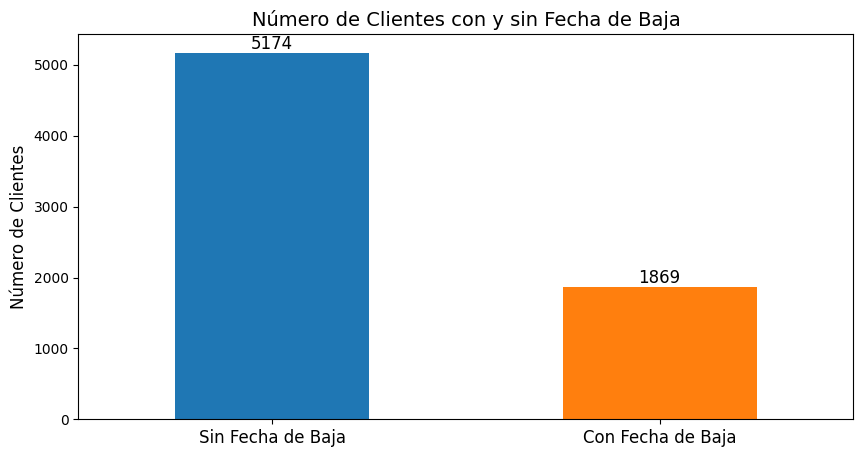

In [33]:
# Crear una nueva columna que indique si el cliente tiene fecha de baja
df['Tiene_Baja'] = df['End_Date'] != '1900-01-01'

# Contar cuantos clientes tienen o no tienen fecha de baja
clientes_baja = df['Tiene_Baja'].value_counts()

plt.figure(figsize=(10, 5))
ax = clientes_baja.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])

# Agregar los numeros encima de las barras
for i, count in enumerate(clientes_baja):
    ax.text(i, count + 50, str(count), ha='center', fontsize=12)

plt.title('Número de Clientes con y sin Fecha de Baja', fontsize=14)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Sin Fecha de Baja', 'Con Fecha de Baja'], rotation=0, fontsize=12)

plt.show()

####  Tipo de contrato de los clientes.
Es importante definir que tipo de contrato tienen los clientes para saber su preferencia y al mismo tiempo cuántos de cada uno de ellos tiene la mayor tasa de cancelación. En este caso, se puede observar que hay mayor número de cancelaciones por parte de los clientes que solo adquieren el servicio durante un mes, esto puede a dar a entender que es por la falta de calidad de los servicios que no fue superada por su expectativa inicial o puede ser por el costo de estos mismos. 

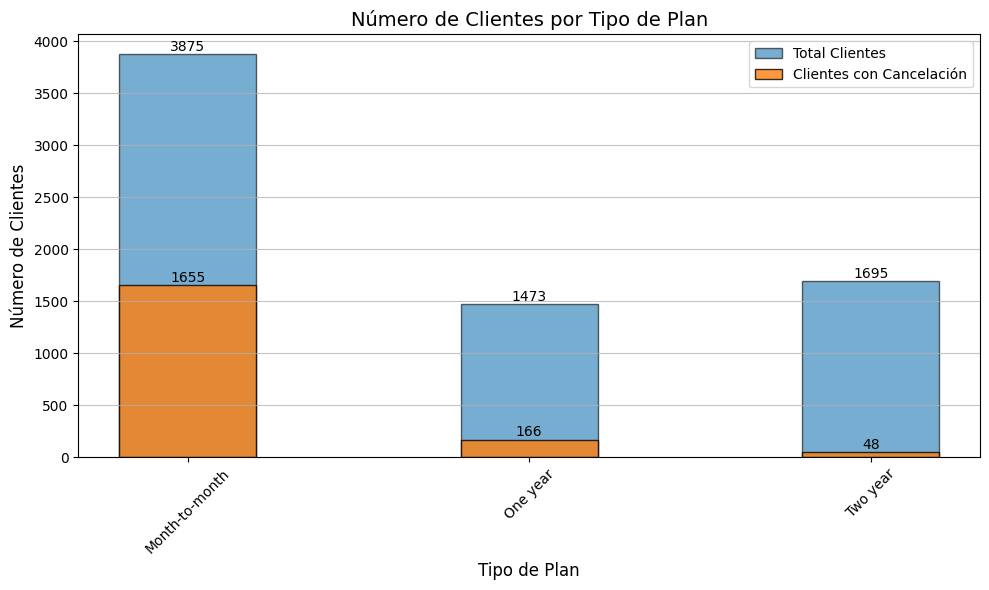

In [34]:
# Contar el numero de clientes por tipo de plan
clientes_por_tipo_plan = df['Type'].value_counts()

# Contar cuantos de ellos tienen fecha de cancelacion
clientes_con_cancelacion = df[df['End_Date'] != '1900-01-01']['Type'].value_counts()

# Crear un DataFrame para facilitar la comparación
datos = pd.DataFrame({
    'Total Clientes': clientes_por_tipo_plan,
    'Clientes con Cancelación': clientes_con_cancelacion
}).fillna(0)  # Llenar con 0 donde no hay cancelaciones

plt.figure(figsize=(10, 6))
bar_width = 0.4
x = range(len(datos))

plt.bar(x, datos['Total Clientes'], width=bar_width, label='Total Clientes', color='#1f77b4', edgecolor='black', alpha=0.6)
plt.bar(x, datos['Clientes con Cancelación'], width=bar_width, label='Clientes con Cancelación', color='#ff7f0e', edgecolor='black', alpha=0.8)

plt.title('Número de Clientes por Tipo de Plan', fontsize=14)
plt.xlabel('Tipo de Plan', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)

plt.xticks(x, datos.index, rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.75)

for i in x:
    plt.text(i, datos['Total Clientes'][i] + 5, int(datos['Total Clientes'][i]), ha='center', va='bottom')
    plt.text(i, datos['Clientes con Cancelación'][i] + 5, int(datos['Clientes con Cancelación'][i]), ha='center', va='bottom')

plt.tight_layout()
plt.show()

####  Número de clientes con fecha próxima de cancelación
Es de suma importancia verificar que tan próxima esta la fecha de término de servicio no solo para preguntar si el cliente desea renovar el contrato o no sino también para verificar si el cliente ha estado contento con los servicios, obtener sugerencias de su parte y también otorgarle promociones. Por esta razón, a continuación se observa los meses en donde hay mayor cantidad de bajas, esto para que se considere realizar una estrategia de marketing y generar promociones que sean atractivas para los clientes.

/tmp/ipykernel_228/2744465599.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['End_Month'] = df_filtered['End_Date'].dt.month_name()  # Nombre del mes


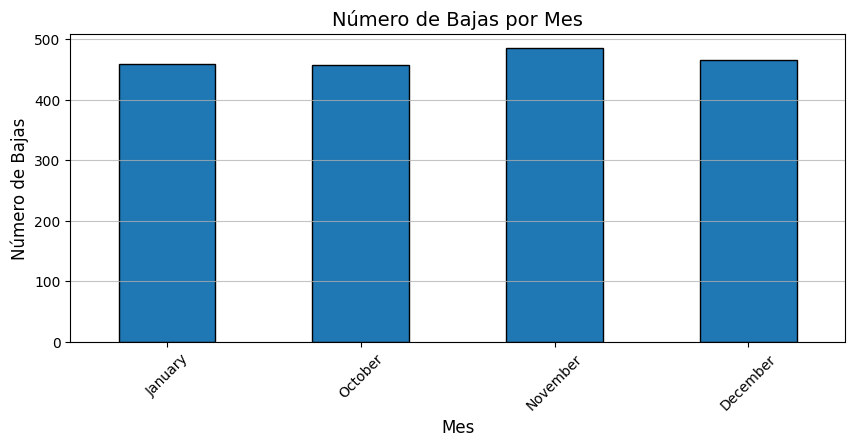

January     460.0
October     458.0
November    485.0
December    466.0
Name: End_Month, dtype: float64


In [35]:
# Filtrar los clientes que tienen una fecha de baja real
df_filtered = df[df['End_Date'] != '1900-01-01']

# Extraer el mes de la fecha de baja
df_filtered['End_Month'] = df_filtered['End_Date'].dt.month_name()  # Nombre del mes

# Contar el numero de bajas por mes
bajas_por_mes = df_filtered['End_Month'].value_counts().sort_index()

# Reordenar los meses para la visualizacion
ordered_months = ['January', 'February', 'March', 'April', 'May', 'June', 
                  'July', 'August', 'September', 'October', 'November', 'December']
bajas_por_mes = bajas_por_mes.reindex(ordered_months)

# Filtrar solo los meses con bajas
bajas_por_mes = bajas_por_mes[bajas_por_mes > 0]

plt.figure(figsize=(10, 4))
bajas_por_mes.plot(kind='bar', color='#1f77b4', edgecolor='black')

plt.title('Número de Bajas por Mes', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Número de Bajas', fontsize=12)

plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

# Mostrar los conteos de bajas por mes
print(bajas_por_mes)

####  Distribución de clientes por tipo de servicio contratado y cancelaciones
En cuanto a los servicios, es indispensable saber que servicios son los que contratan los clientes para obtener una tendencia hacia donde se pueden dirigir el mayor número de ventas y también promociones. Los siguientes servicios son: instalación de teléfono fijo con y sin líneas múltiples, internet que puede instalarse mediante línea telefónica DSL o fibra óptica. 

Por otro lado como extras están el software antivirus, soporte técnico, almacenamiento en la nube, streaming tv y directorio de peliculas. A continuación, observamos cuántos clientes cuentan con servicios básicos y extras asi como cuantos de cada uno han decidido retirarse por estos mismos servicios.

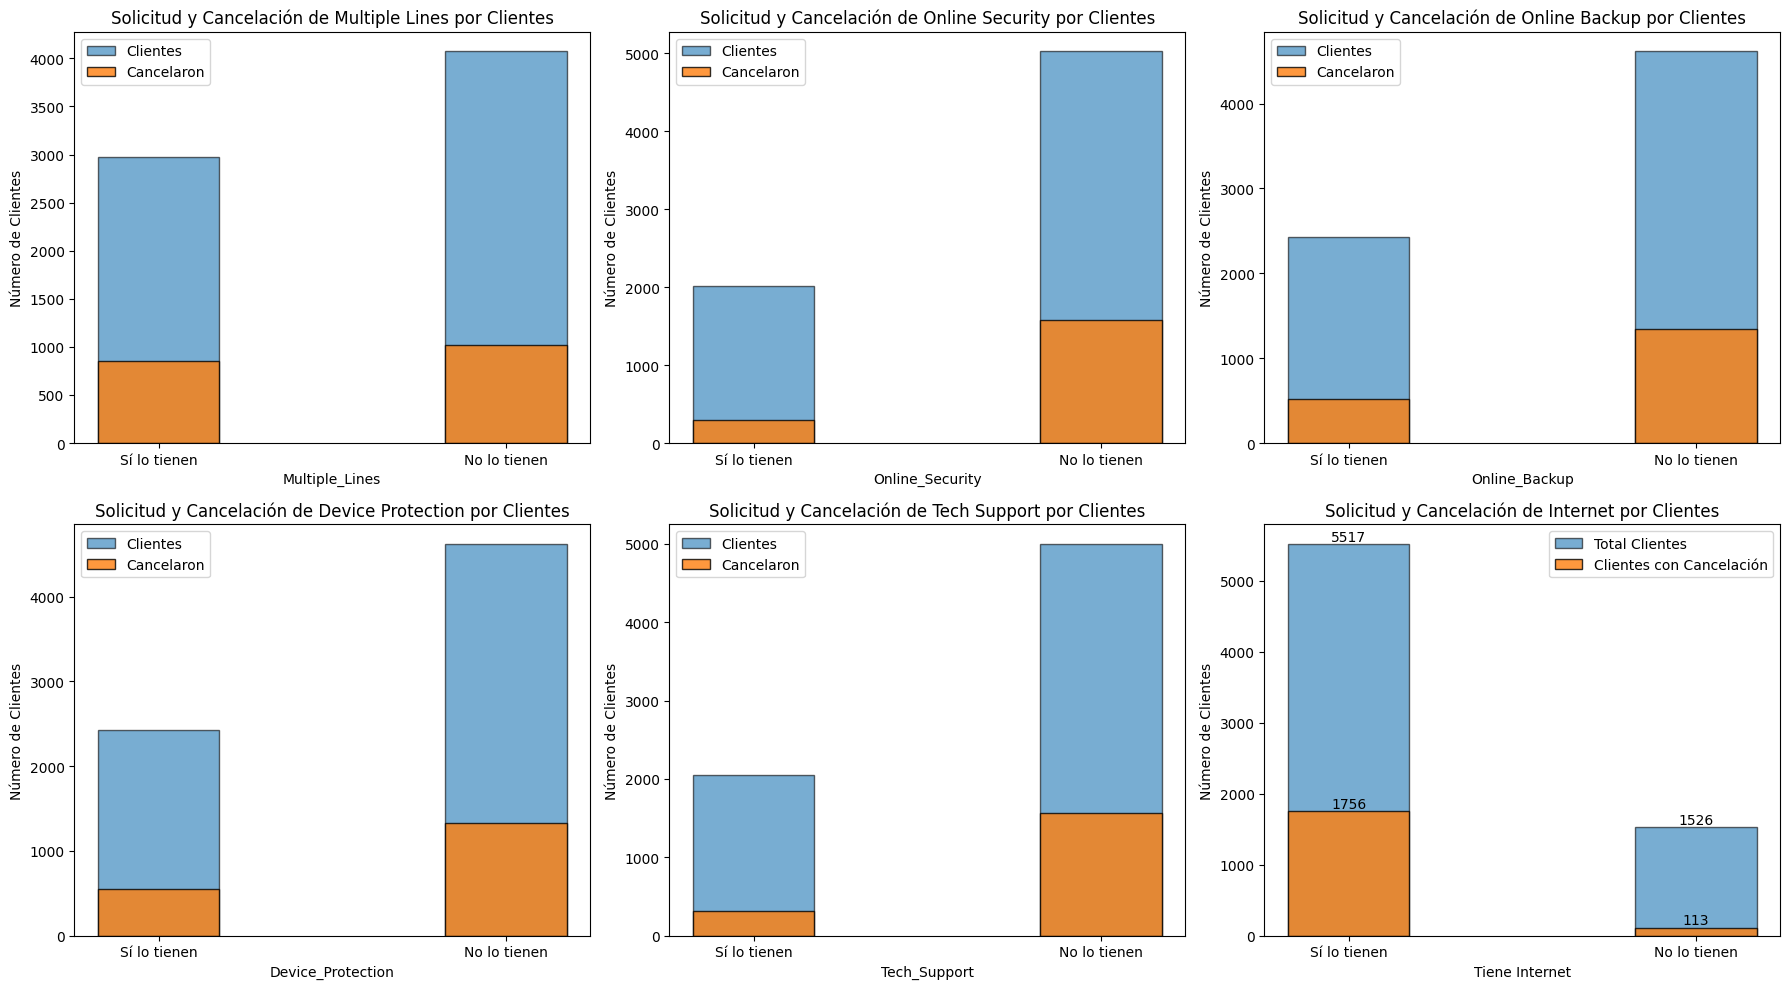

In [36]:
# Lista de servicios a analizar
servicios = ['Multiple_Lines', 'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV', 'Streaming_Movies']

# Inicializar listas
servicio_labels = []
total_tienen_servicio = []
total_no_tienen_servicio = []
cancelaron_tienen_servicio = []
cancelaron_no_tienen_servicio = []

# Recorrer cada servicio y calcular las metricas
for servicio in servicios:
    # Crear una columna temporal que indique si el cliente tiene el servicio
    df[servicio + '_Tiene'] = df[servicio].apply(lambda x: 'Sí' if x == 'Yes' else 'No')
    
    # Contar total de clientes que tienen y no tienen el servicio
    total_count = df[servicio + '_Tiene'].value_counts()

    # Contar clientes que cancelaron y tienen el servicio
    cancel_count_tienen = df[(df['End_Date'] != '1900-01-01') & (df[servicio + '_Tiene'] == 'Sí')].shape[0]
    
    # Contar clientes que cancelaron y no tienen el servicio
    cancel_count_no_tienen = df[(df['End_Date'] != '1900-01-01') & (df[servicio + '_Tiene'] == 'No')].shape[0]

    # Agregar los resultados a las listas
    servicio_labels.append(servicio)
    total_tienen_servicio.append(total_count.get('Sí', 0))
    total_no_tienen_servicio.append(total_count.get('No', 0))
    cancelaron_tienen_servicio.append(cancel_count_tienen)
    cancelaron_no_tienen_servicio.append(cancel_count_no_tienen)

# Crear una columna que indique si el cliente tiene o no internet
df['Tiene_Internet'] = df['Internet_Service'].apply(lambda x: 'Sí' if x != 'No' else 'No')

# Contar cuantos clientes tienen y no tienen internet
clientes_internet = df['Tiene_Internet'].value_counts()

# Contar cuantos clientes con cancelación tienen y no tienen internet
clientes_con_cancelacion_internet = df[(df['End_Date'] != '1900-01-01')]['Tiene_Internet'].value_counts()

datos_internet = pd.DataFrame({
    'Total Clientes': clientes_internet,
    'Clientes con Cancelación': clientes_con_cancelacion_internet
}).fillna(0)  # Llenar con 0 donde no hay cancelaciones

# Configurar el grafico en bloques de 2x3 (2 filas, 3 columnas)
num_filas = 2
num_columnas = 3
fig, axes = plt.subplots(nrows=num_filas, ncols=num_columnas, figsize=(18, 10))
bar_width = 0.35

# Recorrer los servicios y graficar cada uno en un bloque
for i, servicio in enumerate(servicios):
    if i >= num_filas * num_columnas - 1:  # Dejar un espacio para el gráfico de Internet
        break

    ax = axes[i // num_columnas, i % num_columnas] 
    index = [0, 1]
    
    # Barras para clientes que tienen y no tienen el servicio
    ax.bar(index, [total_tienen_servicio[i], total_no_tienen_servicio[i]], bar_width, label='Clientes', color='#1f77b4', alpha=0.6, edgecolor='black')
    
    # Barras para cancelaciones sobre quienes tienen el servicio
    ax.bar(index, [cancelaron_tienen_servicio[i], cancelaron_no_tienen_servicio[i]], bar_width, label='Cancelaron', color='#ff7f0e', alpha=0.8, edgecolor='black')
    
    ax.set_xlabel(f'{servicio}')
    ax.set_ylabel('Número de Clientes')
    ax.set_title(f'Solicitud y Cancelación de {servicio.replace("_", " ")} por Clientes')  # Título ajustado
    ax.set_xticks(index)
    ax.set_xticklabels(['Sí lo tienen', 'No lo tienen'])  # Ajustar etiquetas del eje X
    ax.legend()

# Agregar el grafico de internet en el ultimo bloque
ax_internet = axes[-1, -1]
x = range(len(datos_internet))

# Barras para clientes con y sin internet
ax_internet.bar(x, datos_internet['Total Clientes'], width=bar_width, label='Total Clientes', color='#1f77b4', edgecolor='black', alpha=0.6)
ax_internet.bar(x, datos_internet['Clientes con Cancelación'], width=bar_width, label='Clientes con Cancelación', color='#ff7f0e', edgecolor='black', alpha=0.8)

# Configuraciones del grafico de internet
ax_internet.set_title('Solicitud y Cancelación de Internet por Clientes', fontsize=12)  # Título ajustado
ax_internet.set_xlabel('Tiene Internet', fontsize=10)
ax_internet.set_ylabel('Número de Clientes', fontsize=10)
ax_internet.set_xticks(x)
ax_internet.set_xticklabels(['Sí lo tienen', 'No lo tienen'], rotation=0)  # Ajustar etiquetas del eje X
ax_internet.legend()

# Añadir texto sobre las barras
for i in x:
    ax_internet.text(i, datos_internet['Total Clientes'][i] + 5, int(datos_internet['Total Clientes'][i]), ha='center', va='bottom')
    ax_internet.text(i, datos_internet['Clientes con Cancelación'][i] + 5, int(datos_internet['Clientes con Cancelación'][i]), ha='center', va='bottom')

plt.tight_layout()
plt.show()

En casi todos los servicios, a excepción del internet, hay mayor número de cancelaciones cuando los clientes ni siquiera los han solicitado enfócando el problema entonces en lo que son lo dos servicios básicos de internet y teléfono fijo. Aún no se sabe si el problema está arraigado a que sea la falta de calidad en estos servicios o si es más enfocado a la cuestión el precio de éstos mismos. No obstante sería bueno revisar el punto de calidad para que así se le garantice al cliente que con la compañía obtendrá el mejor de los servicios.

####  Distribución de clientes por tipo de pago

Se está asumiendo que el problema raíz de que la tasa de cancelación aumente es por la calidad de los servicios básicos, no obstante también hay que verificar si por otro lado, los clientes están cancelando debido a los costos de éstos mismos. A continuación, se puede observar dependiendo del plan del cliente los costos mensuales y anuales que éstos representan. De esta manera, nos podemos dar una idea de si el precio está influyendo en que la tasa de cancelación incremente o no.

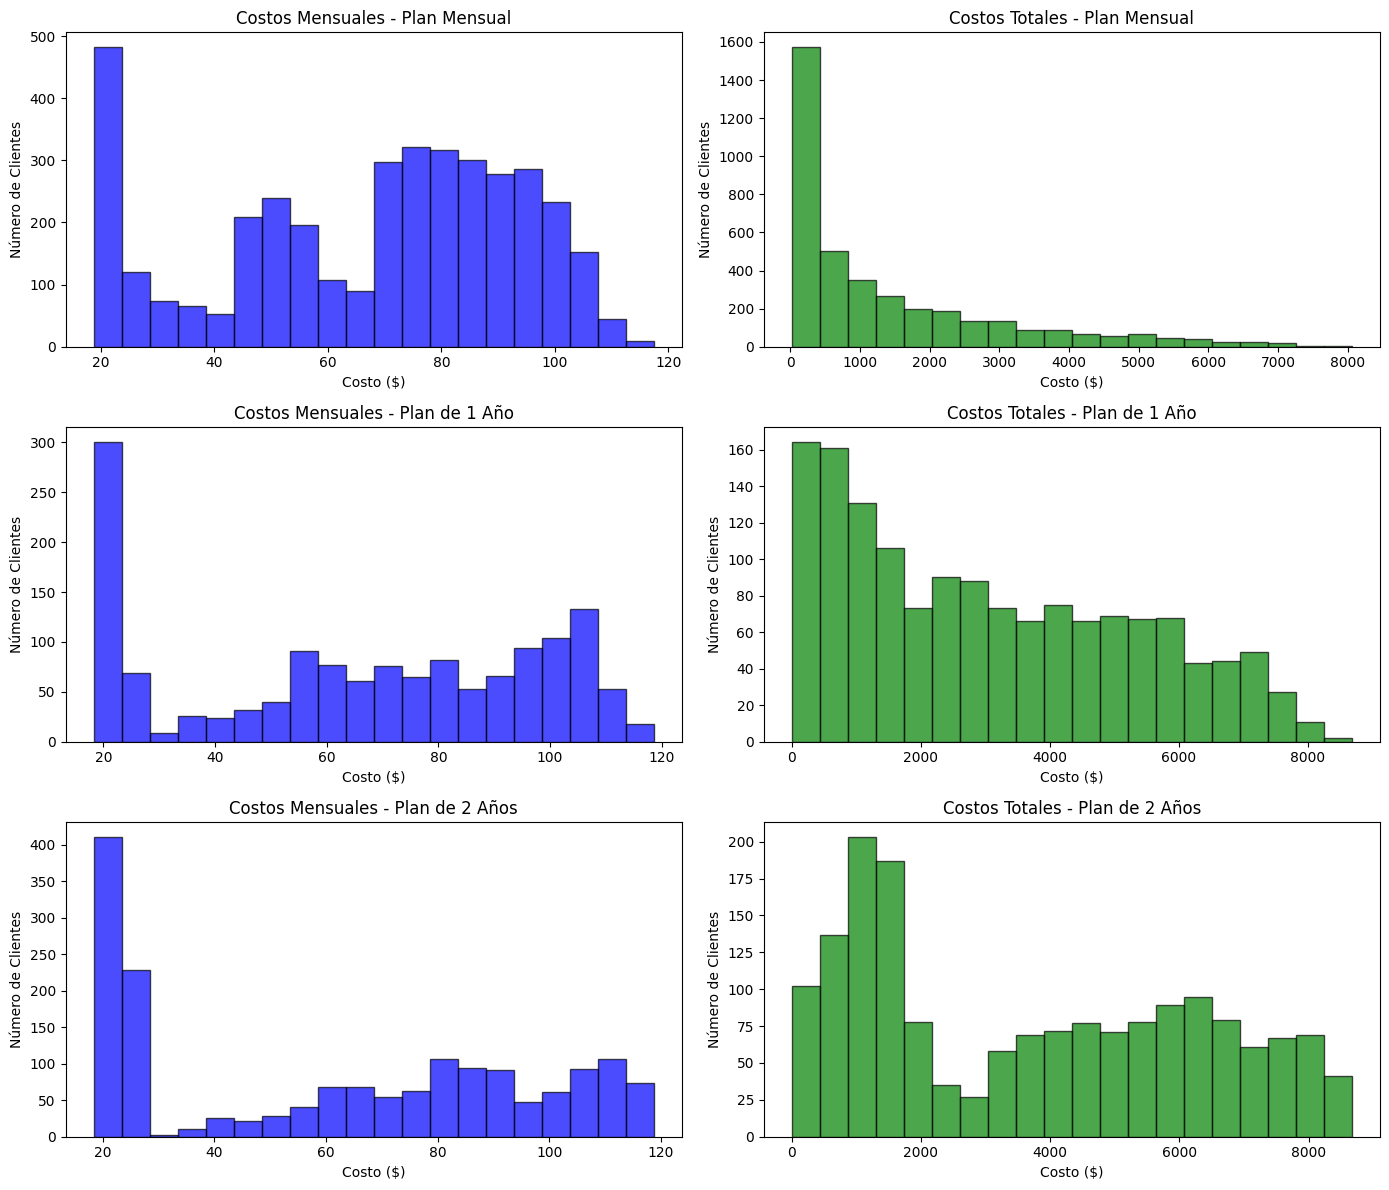

In [37]:
# Filtrar por tipo de contrato
monthly_customers = df[df['Type'] == 'Month-to-month']
one_year_customers = df[df['Type'] == 'One year']
two_year_customers = df[df['Type'] == 'Two year']

# Crear una figura y subplots para cada plan
fig, axs = plt.subplots(3, 2, figsize=(14, 12))

# Gráficos para el plan Mensual
axs[0, 0].hist(monthly_customers['Monthly_Charges'], bins=20, color='blue', alpha=0.7, edgecolor='black')
axs[0, 0].set_title('Costos Mensuales - Plan Mensual')
axs[0, 1].hist(monthly_customers['Total_Charges'], bins=20, color='green', alpha=0.7, edgecolor='black')
axs[0, 1].set_title('Costos Totales - Plan Mensual')

# Gráficos para el plan de 1 Año
axs[1, 0].hist(one_year_customers['Monthly_Charges'], bins=20, color='blue', alpha=0.7, edgecolor='black')
axs[1, 0].set_title('Costos Mensuales - Plan de 1 Año')
axs[1, 1].hist(one_year_customers['Total_Charges'], bins=20, color='green', alpha=0.7, edgecolor='black')
axs[1, 1].set_title('Costos Totales - Plan de 1 Año')

# Gráficos para el plan de 2 Años
axs[2, 0].hist(two_year_customers['Monthly_Charges'], bins=20, color='blue', alpha=0.7, edgecolor='black')
axs[2, 0].set_title('Costos Mensuales - Plan de 2 Años')
axs[2, 1].hist(two_year_customers['Total_Charges'], bins=20, color='green', alpha=0.7, edgecolor='black')
axs[2, 1].set_title('Costos Totales - Plan de 2 Años')

# Etiquetas comunes
for ax in axs.flat:
    ax.set_xlabel('Costo ($)')
    ax.set_ylabel('Número de Clientes')

plt.tight_layout()
plt.show()


Los gráficos muestran que los clientes de planes mensuales tienden a optar por costos más bajos y acumulan menores costos totales debido a una alta tasa de cancelación temprana. En contraste, los clientes de planes a 1 y 2 años están más dispuestos a pagar costos más altos, tanto mensuales como totales, aunque el número de clientes disminuye a medida que los costos aumentan. Los planes a largo plazo atraen a una clientela más diversa en cuanto a disposición de pago, mientras que los clientes de planes mensuales buscan opciones más económicas y de menor duración.

####  Distribución de clientes por dependientes, pareja, jubilados y genero
Muchas veces sino es que la mayoría, los servicios son usualmente compartidos por más de una persona que lo utiliza. Es por ello que a continuación se realiza este análisis, para dedterminar si estos factores externos a los de la misma compañía infieren en la tasa de cancelación.

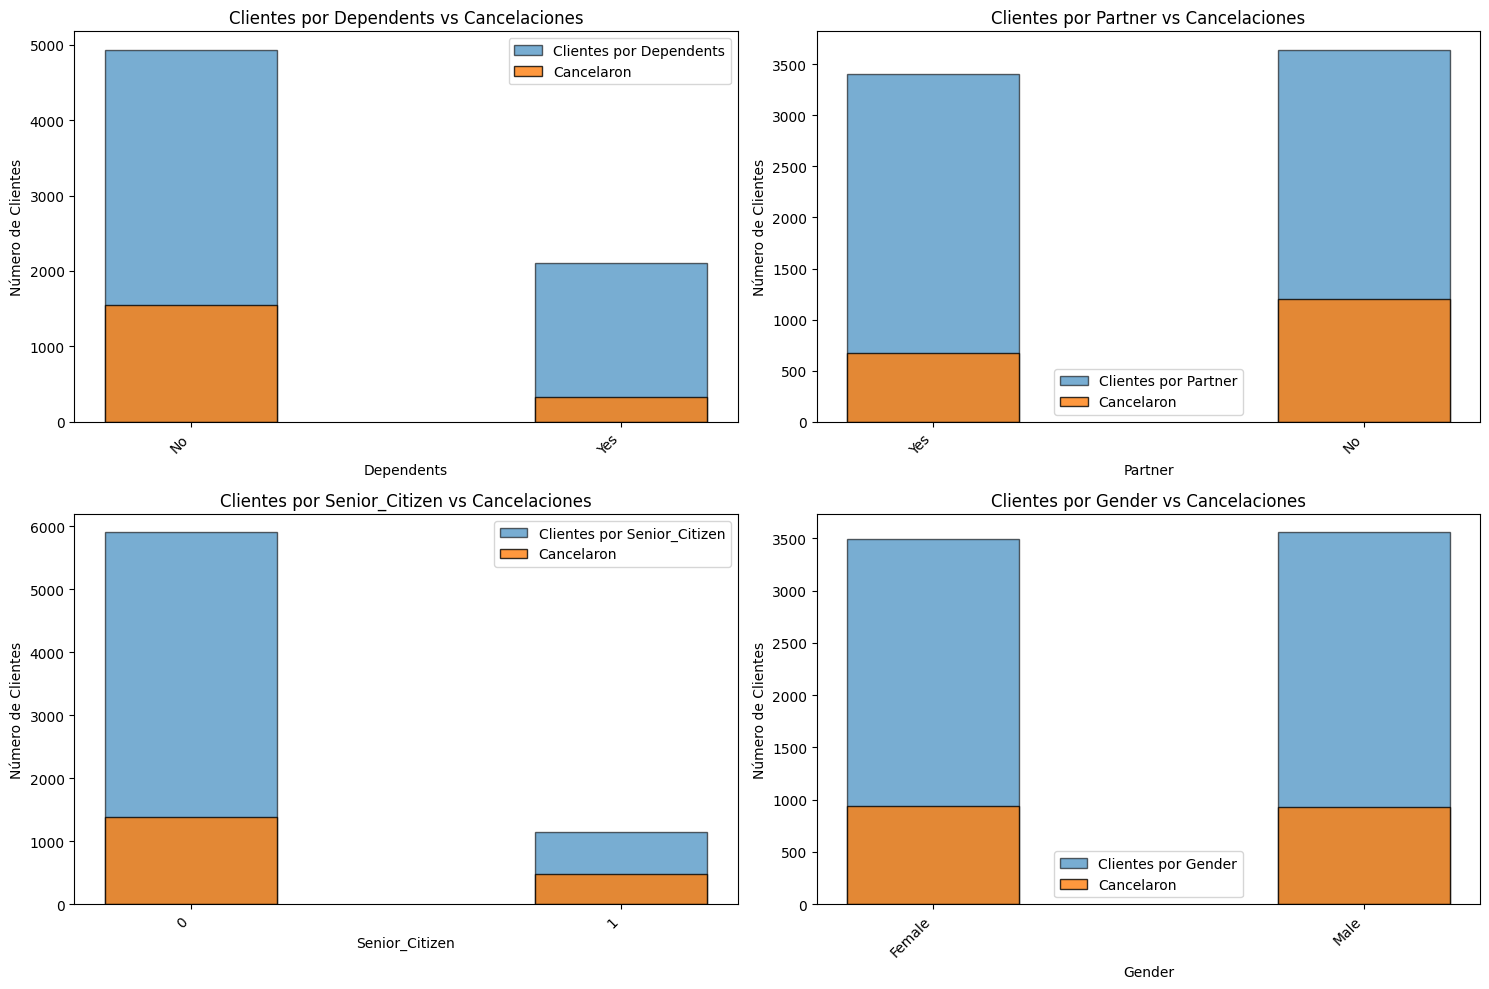

In [38]:
# Definir las categorías a analizar
categorias = ['Dependents', 'Partner', 'Senior_Citizen', 'Gender']

# Inicializar un diccionario para almacenar los resultados
resultados = {}

# Recorrer cada categoría y calcular las métricas
for categoria in categorias:
    # Obtener los valores únicos en cada categoría
    valores = df[categoria].unique()
    
    total_categoria = []
    cancelaron_categoria = []
    
    for valor in valores:
        # Contar total de clientes por valor en la categoría
        total_count = df[df[categoria] == valor].shape[0]
        
        # Contar clientes que cancelaron por valor en la categoría
        cancel_count = df[(df['End_Date'] != '1900-01-01') & (df[categoria] == valor)].shape[0]

        total_categoria.append(total_count)
        cancelaron_categoria.append(cancel_count)
    
    resultados[categoria] = {'valores': valores, 'total': total_categoria, 'cancelaron': cancelaron_categoria}

# Crear gráficos para cada categoría
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Recorrer cada categoría y graficar
for i, categoria in enumerate(categorias):
    ax = axes[i // 2, i % 2]  # Definir posición en la cuadrícula
    
    valores = resultados[categoria]['valores']
    total = resultados[categoria]['total']
    cancelaron = resultados[categoria]['cancelaron']
    
    index = range(len(valores))
    bar_width = 0.4
    
    # Barras para total de clientes por valor en la categoría
    ax.bar(index, total, bar_width, label=f'Clientes por {categoria}', color='#1f77b4', alpha=0.6, edgecolor='black')
    
    # Barras para clientes que cancelaron por valor en la categoría
    ax.bar(index, cancelaron, bar_width, label='Cancelaron', color='#ff7f0e', alpha=0.8, edgecolor='black')
    
    # Añadir etiquetas y título
    ax.set_xlabel(categoria)
    ax.set_ylabel('Número de Clientes')
    ax.set_title(f'Clientes por {categoria} vs Cancelaciones')
    ax.set_xticks(index)
    ax.set_xticklabels(valores, rotation=45, ha='right')
    ax.legend()

# Ajustar el layout
plt.tight_layout()
plt.show()

Los gráficos muestran que los clientes sin dependientes y los ciudadanos mayores tienen una mayor tasa de cancelación en comparación con aquellos con dependientes y los que no son ciudadanos mayores. En cambio, no se observan diferencias significativas en las tasas de cancelación entre clientes con o sin pareja, ni entre géneros, lo que sugiere que estos factores no influyen de manera considerable en las cancelaciones. Por tanto, la presencia de dependientes y la condición de ciudadano mayor parecen ser más relevantes para la tasa de cancelación.

####  Matriz de correlación de características

## Modelo
En cuanto al modelo, es necesario definir las caracteristicas a ocupar las cuales con el análisis previo de la información se ha decidido cuales de ellas verdaderamente influyen en que un cliente se retire o permanezca con los servicios proporcionados por la compañía.  

Además, en este caso, se ha definido que la característica objetivo sea la columna 'End_Date' es igual a 'Yes' para definir si el cliente se va de la compañía. Para ello lo que se realizará es agregar columnas nuevas al dataframe, donde se desglose la columna 'Begin_Date' en comienzo de año, mes, dia, dia entre semana y fin de semana y tamién una columna donde 'End_Date' esté definida si en ceros y unos donde simbolizan si el cliente se va o no llamada 'Churn' nuestro objetivo. Adicional a esto, es necesario codificar aquellas columnas categóricas con one-hot coding para convertirlas en variables numéricas. 

### Definición de características y objetivo

In [39]:
# Eliminar columnas creadas para el EDA
df = df.drop(columns=['Tiene_Baja', 'Multiple_Lines_Tiene','Online_Security_Tiene','Online_Security_Tiene','Online_Backup_Tiene','Device_Protection_Tiene','Tech_Support_Tiene','Streaming_TV_Tiene','Streaming_Movies_Tiene','Tiene_Internet'])

In [40]:
# Crear columna 'Churn' (1 si el cliente se fue, 0 si sigue con la compañía)
df['Churn'] = df['End_Date'].apply(lambda x: 1 if x != pd.Timestamp('1900-01-01') else 0)

# Convertir la columna 'Begin_Date' a diferentes componentes
df['Begin_Year'] = df['Begin_Date'].dt.year
df['Begin_Month'] = df['Begin_Date'].dt.month
df['Begin_Day'] = df['Begin_Date'].dt.day
df['Begin_Weekday'] = df['Begin_Date'].dt.weekday  # 0: Lunes, 6: Domingo
df['Begin_Weekend'] = df['Begin_Weekday'].apply(lambda x: 1 if x >= 5 else 0)

# Eliminar las columnas de fecha
df = df.drop(columns=['Begin_Date', 'End_Date','Customer_ID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Type               7043 non-null   object 
 1   Paperless_Billing  7043 non-null   object 
 2   Payment_Method     7043 non-null   object 
 3   Monthly_Charges    7043 non-null   float64
 4   Total_Charges      7043 non-null   float64
 5   Gender             7043 non-null   object 
 6   Senior_Citizen     7043 non-null   int64  
 7   Partner            7043 non-null   object 
 8   Dependents         7043 non-null   object 
 9   Internet_Service   7043 non-null   object 
 10  Online_Security    7043 non-null   object 
 11  Online_Backup      7043 non-null   object 
 12  Device_Protection  7043 non-null   object 
 13  Tech_Support       7043 non-null   object 
 14  Streaming_TV       7043 non-null   object 
 15  Streaming_Movies   7043 non-null   object 
 16  Multiple_Lines     7043 

In [41]:
# Convertir las columnas con "Yes" y "No" en variables binarias
binary_columns = ['Online_Security', 'Online_Backup', 
                  'Device_Protection', 'Tech_Support', 'Streaming_TV', 
                  'Streaming_Movies', 'Multiple_Lines', 'Paperless_Billing', 'Partner', 'Dependents']
df[binary_columns] = df[binary_columns].replace({'Yes': 1, 'No': 0})

# Convertir las columnas categóricas 'Type' e 'Internet_Service' utilizando One-Hot Encoding
df = pd.get_dummies(df, columns=['Type', 'Internet_Service','Payment_Method', 'Gender'], drop_first=True)

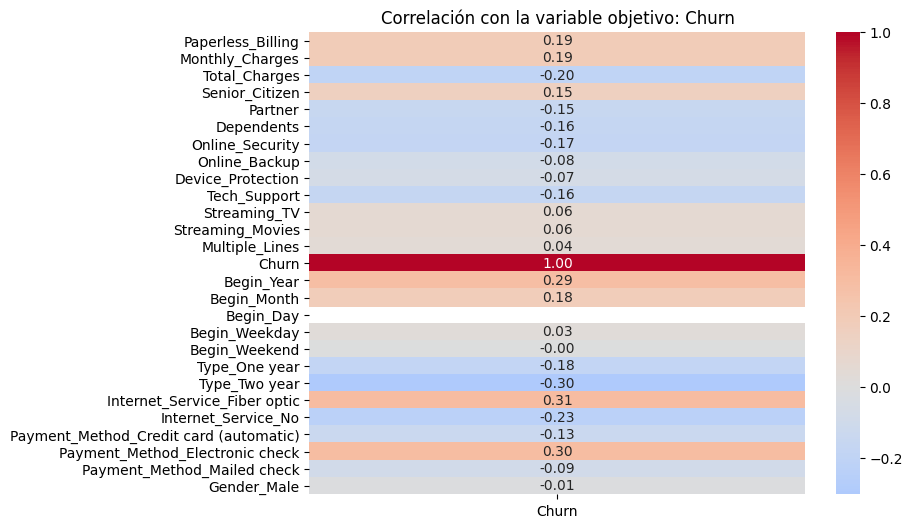

In [42]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Extraer la correlación de todas las características con respecto a 'Churn'
churn_correlation = correlation_matrix[['Churn']]

# Visualizar la correlación con 'Churn'
plt.figure(figsize=(8, 6))
sns.heatmap(churn_correlation, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlación con la variable objetivo: Churn')
plt.show()

Primero que nada, hay que destacar que es de suma importancia eliminar aquellas columnas que tengan una correlación de 1 o-1 con la variable objetivo 'Churn' ya que si se incluyen en el modelo esto puede afectar que las predicciones sean exactas. 
Ahora después de haber analizado este punto, con el objetivo de que el modelo no maneje información irreleevante, se ha decidio que se tienen que retirar del modelo las siguientes columnas ya que no aportarían al resultado de la tasa de cancelación: 
Aquí algunas sugerencias de características que podrías descartar fácilmente, ya que su correlación con Churn es baja:

1. Gender_Male: Correlación = -0.01
2. Payment_Method_Mailed check: Correlación = -0.09
3. Payment_Method_Credit card (automatic): Correlación = -0.09
4. Internet_Service_No: Correlación = -0.23
5. Begin_Weekend: Correlación = -0.00
6. Begin_Weekday: Correlación = 0.03
7. Begin_Day: Correlación = 0.18 (moderadamente baja)
8. Payment_Method_Electronic check: Correlación = 0.09
9. Senior_Citizen: Correlación = 0.15
10. Tech_Support: Correlación = 0.16
11. Device_Protection: Correlación = 0.16
12. Online_Security: Correlación = -0.08
13. Online_Backup: Correlación = -0.08
14. Streaming_TV: Correlación = 0.06
15. Streaming_Movies: Correlación = 0.04

In [43]:
# Omitir las columnas innecesarias
df = df.drop(columns=['Gender_Male','Payment_Method_Mailed check','Payment_Method_Credit card (automatic)','Internet_Service_No','Begin_Weekend','Begin_Weekday','Begin_Day','Payment_Method_Electronic check','Senior_Citizen','Tech_Support','Device_Protection','Online_Security','Online_Backup','Streaming_TV','Streaming_Movies'])

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Paperless_Billing             7043 non-null   int64  
 1   Monthly_Charges               7043 non-null   float64
 2   Total_Charges                 7043 non-null   float64
 3   Partner                       7043 non-null   int64  
 4   Dependents                    7043 non-null   int64  
 5   Multiple_Lines                7043 non-null   int64  
 6   Churn                         7043 non-null   int64  
 7   Begin_Year                    7043 non-null   int64  
 8   Begin_Month                   7043 non-null   int64  
 9   Type_One year                 7043 non-null   uint8  
 10  Type_Two year                 7043 non-null   uint8  
 11  Internet_Service_Fiber optic  7043 non-null   uint8  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 570.9 KB


### Conjuntos de entrenamiento y prueba

In [45]:
# Definir características y objetivo
features = df.drop(columns=['Churn'])
target = df['Churn']

In [46]:
# dividir en conjunto de entrenamiento y prueba - 70% entrenamiento y 30% prueba
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, shuffle=False)

In [47]:
# verificar tamaño de caracteristicas y objetivos de entrenamiento y prueba
print("Tamaño de features_train:", features_train.shape)
print("Tamaño de features_test:", features_test.shape)
print("Tamaño de target_train:", target_train.shape)
print("Tamaño de target_test:", target_test.shape)
print("\n")

Tamaño de features_train: (4930, 11)
Tamaño de features_test: (2113, 11)
Tamaño de target_train: (4930,)
Tamaño de target_test: (2113,)




### Desbalance de clases
Es fundamental verificar si existe un desbalance de clases antes de incorporar los datos al modelo, es decir, si hay una diferencia significativa en el número de clientes que deciden cancelar o continuar con el servicio. Esto es importante para evitar un sobreajuste en las predicciones, ya que el modelo podría sesgarse hacia una respuesta debido a la distribución de los datos, es decir, que en realidad la tasa sea mucho menor de lo que aparenta y que la compañía no se tenga que preocupar de perder clientes lo cual es falso.

In [48]:
# Contamos cuantos clientes tienen actividad y cuantos otros no
target_counts = df['Churn'].value_counts()

print("Conteo de instancias por clase (cliente se da de baja o no):")
print(target_counts)

Conteo de instancias por clase (cliente se da de baja o no):
0    5174
1    1869
Name: Churn, dtype: int64


Observamos que el número de clientes que decide quedarse es mayor por un 73% en comparación con los que cancelan demostrando un desbalance entre clases. Para abordar este desbalance, podemos optar por dos enfoques: aumentar el número de clientes que cancelan o reducir el de aquellos que se quedan. Se probarán ambas opciones para determinar cuál es más efectiva para mejorar el rendimiento del modelo.

In [49]:
# Esta funcion es para poder hacer un sobremuestreo
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)

    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [50]:
# Esta funcion es para poder hacer un submuestreo
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])

    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)

    return features_downsampled, target_downsampled


features_downsampled, target_downsampled = downsample(features_train, target_train, 0.5)

Aplicamos el submuestreo y sobremuestreo solo a las caracteristicas y objetivo del conjunto de entrenamiento.

In [51]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)  # '4' significa que repetirás 4 veces la clase minoritaria

In [52]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.5)  # '0.5' significa que mantienes el 50% de la clase mayoritaria

### Modelo con sobremuestreo de clases y Validación cruzada

Resultados (sobremuestreo):
Accuracy: 0.77
Precision: 0.78
Recall: 0.86
F1 Score: 0.82
ROC AUC: 0.84


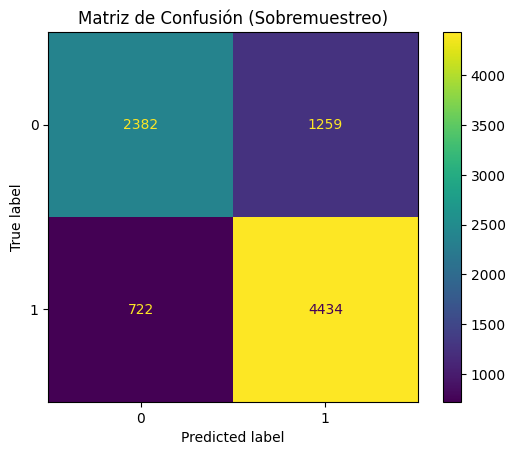

In [53]:
# Modelo con sobremuestreo
model = LogisticRegression(random_state=12345, max_iter=1000)

# Configurar validación cruzada estratificada
skf = StratifiedKFold(n_splits=5, random_state=12345, shuffle=True)

# Usar cross_val_predict para obtener predicciones
predictions_upsampled = cross_val_predict(model, features_upsampled, target_upsampled, cv=skf)

# Calcular métricas
accuracy_upsampled = accuracy_score(target_upsampled, predictions_upsampled)
precision_upsampled = precision_score(target_upsampled, predictions_upsampled)
recall_upsampled = recall_score(target_upsampled, predictions_upsampled)
f1_upsampled = f1_score(target_upsampled, predictions_upsampled)
roc_auc_upsampled = roc_auc_score(target_upsampled, model.fit(features_upsampled, target_upsampled).predict_proba(features_upsampled)[:, 1])

print(f"Resultados (sobremuestreo):")
print(f"Accuracy: {accuracy_upsampled:.2f}")
print(f"Precision: {precision_upsampled:.2f}")
print(f"Recall: {recall_upsampled:.2f}")
print(f"F1 Score: {f1_upsampled:.2f}")
print(f"ROC AUC: {roc_auc_upsampled:.2f}")

# Generar matriz de confusión
conf_matrix_upsampled = confusion_matrix(target_upsampled, predictions_upsampled)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_upsampled)
disp.plot()
plt.title('Matriz de Confusión (Sobremuestreo)')
plt.show()

### Modelo con submuestreo de clases

Resultados (submuestreo):
Accuracy: 0.75
Precision: 0.71
Recall: 0.67
F1 Score: 0.69
ROC AUC: 0.83


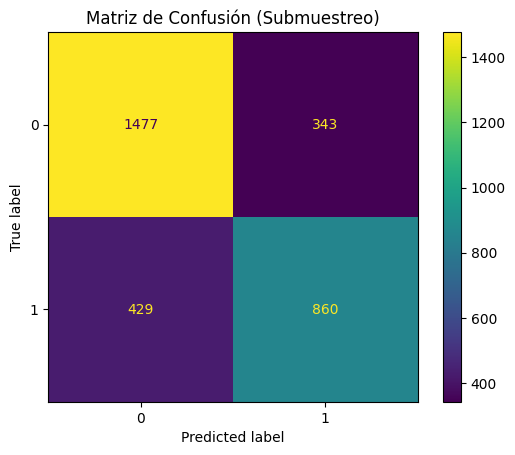

In [54]:
# Modelo con submuestreo
model = LogisticRegression(random_state=12345, max_iter=1000)

# Usar cross_val_predict para obtener predicciones en submuestreo
predictions_downsampled = cross_val_predict(model, features_downsampled, target_downsampled, cv=skf)

# Calcular métricas
accuracy_downsampled = accuracy_score(target_downsampled, predictions_downsampled)
precision_downsampled = precision_score(target_downsampled, predictions_downsampled)
recall_downsampled = recall_score(target_downsampled, predictions_downsampled)
f1_downsampled = f1_score(target_downsampled, predictions_downsampled)
roc_auc_downsampled = roc_auc_score(target_downsampled, model.fit(features_downsampled, target_downsampled).predict_proba(features_downsampled)[:, 1])

print(f"Resultados (submuestreo):")
print(f"Accuracy: {accuracy_downsampled:.2f}")
print(f"Precision: {precision_downsampled:.2f}")
print(f"Recall: {recall_downsampled:.2f}")
print(f"F1 Score: {f1_downsampled:.2f}")
print(f"ROC AUC: {roc_auc_downsampled:.2f}")

# Generar matriz de confusión
conf_matrix_downsampled = confusion_matrix(target_downsampled, predictions_downsampled)
disp_downsampled = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_downsampled)
disp_downsampled.plot()
plt.title('Matriz de Confusión (Submuestreo)')
plt.show()

Al hacer la comparación entre los datos obtenidos de las métricas en ambos modelos de sobremuestreo y submuestreo, se observa que el modelo con el sobremuestreo es superior y con mejores valores para accuracy, precision, recall, F1 score, y ROC AUC.
Por lo tanto, el modelo de sobremuestreo continúa siendo el más efectivo, especialmente en términos de recall, que es crucial para la identificación de clientes que se dan de baja.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

He notado que en las secciones 4.4 y 4.5, al entrenar los modelos con sobremuestreo y submuestreo, estás obteniendo métricas de evaluación perfectas, es decir, todos los valores de accuracy, precision, recall, F1 Score y ROC AUC son 1.00. Esto es altamente inusual y sugiere que podría haber algún error en el proceso de modelado.

**Por qué no es natural tener siempre 1.00 en las métricas:**

- **Fuga de datos (Data Leakage):** Es posible que información del conjunto de prueba esté siendo filtrada al modelo durante el entrenamiento. Por ejemplo, si sin querer incluyes la variable objetivo como una de las características, el modelo aprenderá a predecir perfectamente, pero no será útil en datos nuevos.

- **Variables altamente correlacionadas:** Si alguna de las características está directamente correlacionada con la variable objetivo (por ejemplo, una columna que indica directamente si el cliente canceló), el modelo puede predecir con precisión perfecta sin generalizar correctamente.

- **Procesamiento indebido de datos:** Si el sobremuestreo o submuestreo se aplica después de dividir los datos en entrenamiento y prueba, y de alguna manera afecta al conjunto de prueba, esto puede causar resultados engañosamente altos.

**Cómo revisar y corregir los errores:**

1. **Verifica la presencia de Data Leakage:**

   - Asegúrate de que no estás incluyendo la variable objetivo 'Churn' o alguna transformación de ella en las características de entrenamiento.


2. **Revisa las características utilizadas:**

   - Examina la correlación entre las características y la variable objetivo. Si alguna característica tiene una correlación muy cercana a 1 o -1, podría estar causando que el modelo aprenda de forma trivial.
   - Específicamente, la columna 'Contract_Duration_Days' podría ser problemática si los clientes que no han cancelado tienen una duración fija (por ejemplo, 0 días) y los que han cancelado tienen otra duración distinta.

3. **Aplica el sobremuestreo y submuestreo correctamente:**

   - El sobremuestreo y submuestreo deben aplicarse **solo** al conjunto de entrenamiento, **después** de haber dividido los datos en entrenamiento y prueba.
   - Asegúrate de que no estás incluyendo datos del conjunto de prueba en el proceso de sobremuestreo o submuestreo.

4. **Revisa la validación cruzada:**

   - Confirma que la validación cruzada está bien configurada y que no hay mezcla de datos entre los pliegues (folds).
   - Considera utilizar `cross_val_predict` para obtener predicciones en el conjunto de entrenamiento y calcular las métricas de manera más realista.

5. **Evalúa el modelo con una matriz de confusión:**

   - Genera una matriz de confusión para ver cómo se están distribuyendo las predicciones.
   - Esto te permitirá identificar si el modelo está prediciendo una sola clase o si realmente está acertando en todas las predicciones.



<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
    
Muchas gracias por las observaciones, me ayudaron mucho a poder identificar mis errores y mejorar mi código. 
</div>


## Conclusión

<div class="alert alert-block alert-warning">
<b>Comentario final</b> <a class="tocSkip"></a>

¡Excelente trabajo, Ilse! Has demostrado habilidades sólidas en análisis y visualización de datos.

**Aspectos positivos:**

- Realizaste una limpieza y preparación de datos adecuada.
- Utilizaste correctamente diversas técnicas de análisis y pruebas estadísticas.
- Las visualizaciones son apropiadas y apoyan tus conclusiones.

**Sugerencias para mejorar:**

- Corregir la sección de sobre muestro y submuestreo en donde haya Precision: 1.00
    

¡Sigue así y mucho éxito en tus futuros proyectos! 🚀

</div>


En este proyecto, la regresión logística demostró ser un modelo adecuado para predecir la tasa de baja de clientes. Su simplicidad, capacidad de interpretación y eficiencia computacional lo convierten en una herramienta ideal para el análisis de deserción. Este modelo no solo permitió identificar con precisión las características que influyen en la decisión de los clientes de abandonar el servicio, sino que también ofrece probabilidades que pueden ayudar a tomar decisiones estratégicas basadas en datos.

Este enfoque proporciona una base sólida para campañas de marketing personalizadas dirigidas a reducir la tasa de deserción. Las empresas pueden centrarse en mejorar los servicios que más afectan la retención de clientes, y al mismo tiempo, realizar promociones específicas para retener a aquellos usuarios con un mayor riesgo de baja.



# Comentario Final del Revisor 
<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Hola Ilse! 😊

¡Felicidades por completar tu proyecto final! Has realizado un trabajo impresionante al analizar los datos de Interconnect para predecir la tasa de cancelación de clientes. A continuación, te presento mis comentarios:

#### Aspectos Positivos:

- **Preprocesamiento de datos exhaustivo:** Has demostrado una gran habilidad al limpiar y preparar los datos de múltiples fuentes, manejando valores nulos, duplicados y tipos de datos. La creación de funciones para automatizar este proceso muestra un enfoque eficiente y profesional.

- **Análisis Exploratorio de Datos (EDA):** Tu EDA es completo y bien estructurado. Las visualizaciones son claras y ayudan a entender mejor el comportamiento de los clientes. Has identificado correctamente patrones importantes, como la mayor tasa de cancelación en contratos mensuales y entre clientes sin dependientes.

- **Manejo del desbalance de clases:** Abordaste adecuadamente el problema del desbalance de clases utilizando técnicas de sobremuestreo y submuestreo, lo cual es esencial para obtener un modelo equilibrado y justo.

- **Conclusiones sólidas:** Tus conclusiones están bien fundamentadas y ofrecen recomendaciones prácticas que podrían ayudar a la empresa a reducir la tasa de deserción.


#### Áreas para Seguir Investigando:

- **Análisis de satisfacción del cliente:** Podrías incorporar datos sobre satisfacción o feedback de los clientes para enriquecer el modelo y hacerlo más predictivo.

- **Segmentación de clientes:** Explora la posibilidad de segmentar a los clientes en grupos más pequeños para ofrecer soluciones y estrategias más personalizadas.

- **Feature Engineering avanzado:** Investiga técnicas más avanzadas de ingeniería de características, como la creación de variables interactivas o el uso de transformaciones no lineales.

¡Sigue adelante! Tu dedicación y esfuerzo se reflejan en este proyecto. Estás en el camino correcto para convertirte en una excelente profesional en ciencia de datos. ¡Mucho éxito en tus futuros proyectos! 🚀🌟

</div>
